# Obligatorisk oppgave

## oppgave 1
### 1a)
Vi har at $g(t) =  A\sin(2\pi ft)$, der $A=1$m, $f=200$Hz. vi har at samplingsfrekvens $f_s=1$kHz, og at samplingstiden $T=1$s. vi kjenner til relasjonen $f_s = 1/\Delta t$ og har dermed også at $\Delta t = f_s^{-1}=1$ms.

In [1]:
"""Dette terminalvinduet er felles for all kode uanvhengig av oppgave"""
"""Modules"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

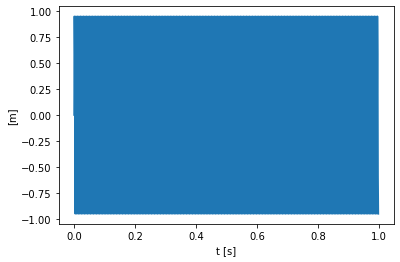

In [2]:
"""Parametere felles for oppgave 1"""
#below are given specifically in assignment
f_s = 1e3 #Hz, sample frequency
A = 1 #m, ????
T = 1 #s, sample period.
dt = 1/f_s #timestep, s
N = int(T/dt)
t = np.arange(0,T,dt) #time array from 0 to T, with increment dt.

def g(t,f):
    return A*np.sin(2*np.pi*f*t)

x = g(t,f=200) #

plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('[m]')
plt.show()

utfører en diskret fourier transformasjon. Dette gjør jeg med scipy sin "fft" funksjon. Scipy funksjonen implementerer denne formelen:
$$
X_k = \frac{1}{N}\sum_{n=0}^{N-1}x_n e^{-i\frac{2\pi}{N}kn}.
$$

Text(0, 0.5, '[m]')

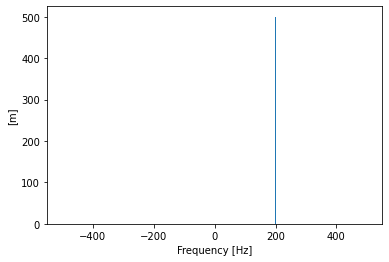

In [3]:
"""lager arrays for DFT, og plotter de"""
x_fourier = fft.fft(x)
f_array = fft.fftfreq(N,dt)
plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('[m]')

Vi ser i plottet at vi har en topp på $f=200$Hz, som er hva vi forventer å se, da dette er fourier transformasjon av en funksjon med frekvens $f=200$. Vi ser også at amplituden er ganske svær, som også er omtrent er som forventet, da denne toppen skal være en $\delta$ funksjon, der toppen strengt talt går mot uendelig, men dette skjer jo ikke fordi vi gjør ting på numerisk vis.

## 1b)
kjører nå DFT på g(t) der frekvensen $f$ er 800,1400, og 1800Hz.

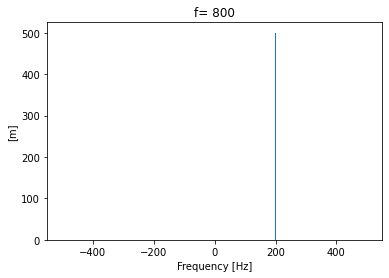

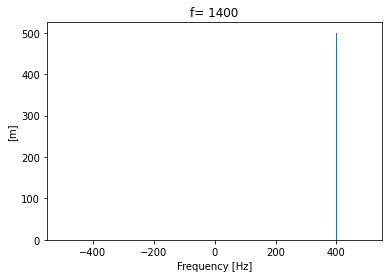

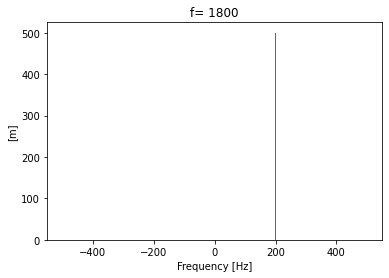

In [4]:
freqs = [800,1400,1800]
for i in freqs:
    x = g(t,f=i) #
    x_fourier = fft.fft(x)
    plt.bar(f_array,np.abs(x_fourier))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('[m]')
    plt.title(f'f= {i}')
    plt.show()

Vi ser for $g(f=800,t)$ at vi har en topp i $f=200$Hz, som ikke tilsvarer hva vi så i oppgave 1a, der vi så at DFT for $g(f=200,t)$ hadde en topp i $f=200$Hz. Dette kan forklares ved Nyquist-Shannon samplingsteoremet som sier:
"The sampling frequency must be at least twice as high as the highest frequency component in a signal for the sampled signal to provide an unambiguous picture of the signal.". Altså for F=800Hz, så skulle samplingsfrekvensen $f_s$ vært minst 1600Hz. Det som skjer når kriteriet ikke er møtt, er at vi får en "falsk" frekvens som følge av folding, og da får vi en alias frekvens.
somsom

## oppgave 2
### a)


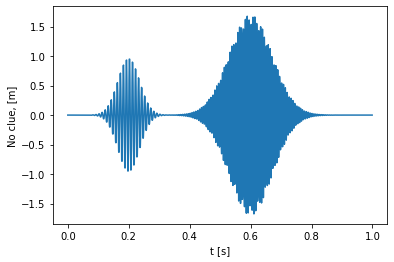

Text(0, 0.5, 'unsure')

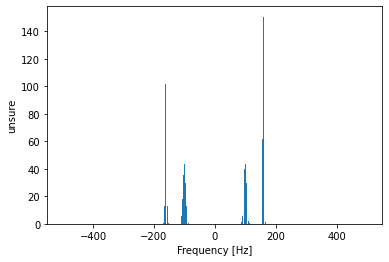

In [5]:
"""Modules"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
"""Constants"""
A1 = 1      #m
A2 = 1.7    #m
f1 = 100    #Hz, frequency 1
f2 = 160    #Hz, frequency 2
t1 = 0.2    #s
t2 = 0.6    #s
sigma1 = 0.05   #s
sigma2 = 0.10   #s

f_s = 1e3       #Hz
T = 1           #s
dt = 1/f_s #timestep, s
N = int(np.ceil(T/dt))


def f(t):
    A = A1*np.sin(2*np.pi*f1*t)*np.exp(-((t-t1)/sigma1)**2)
    B = A2*np.sin(2*np.pi*f2*t)*np.exp(-((t-t2)/sigma2)**2)
    return A+B

t = np.arange(0,T,dt) #time array from 0 to T, with increment dt.
x = f(t)


plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('No clue, [m]')
plt.show()
x_fourier = fft.fft(x)
f_array = fft.fftfreq(N,dt)

plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

### 2b)

N 1000


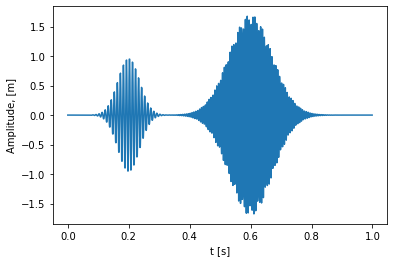

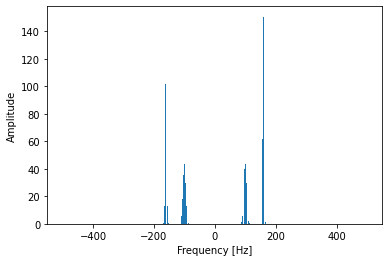

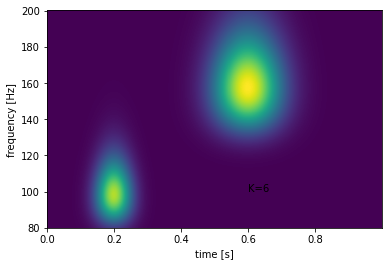

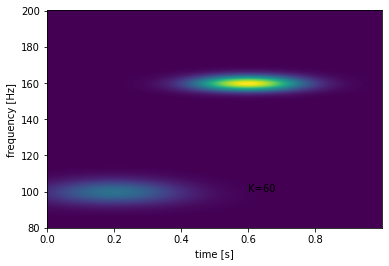

In [3]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

"""Constants"""
A1 = 1      #m
A2 = 1.7    #m
f1 = 100    #Hz, frequency 1
f2 = 160    #Hz, frequency 2
t1 = 0.2    #s
t2 = 0.6    #s
sigma1 = 0.05   #s
sigma2 = 0.10   #s

f_s = 1e3       #Hz, sampling frequency
T = 1           #s
dt = 1/f_s #timestep, s
N = int(np.ceil(T/dt))
print('N',N)
def f(t):
    A = A1*np.sin(2*np.pi*f1*t)*np.exp(-((t-t1)/sigma1)**2)
    B = A2*np.sin(2*np.pi*f2*t)*np.exp(-((t-t2)/sigma2)**2)
    return A+B

t = np.arange(0,T,dt) #time array from 0 to T, with increment dt.
x = f(t)

plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('Amplitude, [m]')
plt.show()
# regn ut og plot DFT via FFT her
x_fourier = fft.fft(x)
f_array = fft.fftfreq(N,dt)
plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()
# forslag til funksjoner



# implementer morlet wavelet i tidsdomenetet
def wavelet_td(omegaa, K, tk, tn):
    psi = C*( np.exp(-1j*omegaa*(tn-tk)) - np.exp(-K**2))*np.exp(-omegaa**2*(tn-tk)**2/(2*K)**2)
    return psi # returner wavelet ̈en, for gitte parametre

# wavelet transformen (i tidsdomenet)
def wavelet_transform_td(t, tk, xn, omegaa, K, N):
    A =  wavelet_td(omegaa,K,tk,t)
    gamma = np.zeros(N, dtype=np.complex )
    gamma = np.sum(np.conjugate(A)*xn)
    return gamma # returnerer gamma, for en gitt omegaa
# diagramfunksjon (felles for tids- og Fourierdomenet)

def wavelet_diagram(t, xn, omega_range, K, N):
    M = len(omega_range)
    diagram = np.zeros((M,N),dtype=np.complex)
    tk = t.copy()
    for i in range(N):
        for j in range(M):
            diagram[j,i] = wavelet_transform_td(t,tk[i], xn,omega_range[j],K,N)
    return diagram # returnerer et 2D diagram for en gitt K
# generere og plotte wavelets
K_vals = [6, 60]
tk = 0
C = 1
for K in K_vals:
    omegas = np.logspace(np.log10(80), np.log10(200), N) * 2 * np.pi # definere hvike analysefrekvenser du vil bruke her
    waveletDiagram6 = wavelet_diagram(t, x, omegas, K, N) # dette kallet gir ut en 2D diagram, og en gitt tidserie, valgt K-verdi og set av ønskete omegas
    plt.pcolormesh(t, omegas / 2.0 / np.pi, np.absolute(waveletDiagram6), shading='auto')
    plt.text(0.6,100,f'K={K}')
    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')
    plt.show()


## Oppgave 3
### a)

/tmp/ipykernel_2181/3934395783.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('mistle_thrush.wav')


T =  2.1609166666666666


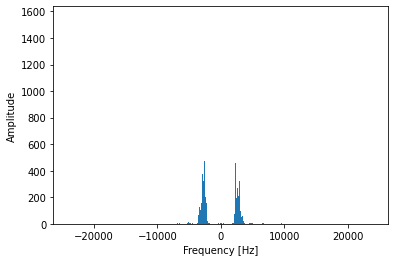

In [7]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy.io import wavfile
from scipy import signal


samplerate, data = wavfile.read('mistle_thrush.wav')
x_n  = data[:,0] # time series, N samples
N = data.shape[0] # number of samples
f_s = samplerate
dt = 1/f_s
T = N / f_s
print('T = ',T)

x_fourier = fft.fft(x_n)
f_array = fft.fftfreq(N,dt)
plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

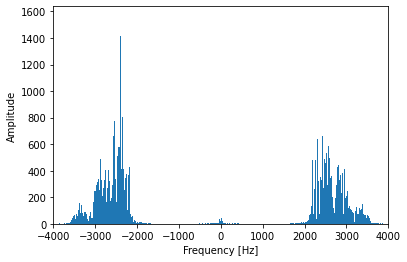

In [8]:
plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(-4000,4000)
plt.show()

Vi kan se fra plottene at interesseområdet blir på en frekvens fra 2kHz til litt i underkant av 4kHz.

In [9]:
print('sampling frequency = ',f_s)

sampling frequency =  48000


### b)
Vi ser at samplingsfrekvensen $f_s=48$kHz.

N_subsample: 6
index0: 38400 index_max: 48000
len x_new_range: (1600,)
T: 0.2 dt: 0.000125 N: 1600
len x_fourier: 1600
len f_array: 1600


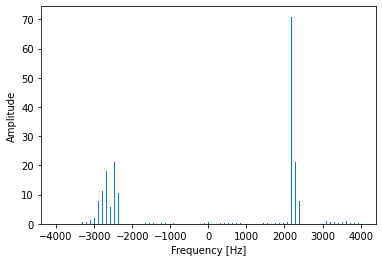

In [12]:
f_nyquist = 8000
N_subsample = int(f_s/f_nyquist)
print('N_subsample:',N_subsample)

index_0 = int(0.8/dt) #lowest required index
index_max = int(1/dt) #highest required index
print('index0:',index_0,'index_max:',index_max)

x_new_range = x_n[index_0:index_max:N_subsample]
print('len x_new_range:',np.shape(x_new_range))

T = 0.2 #duration of signal

N = len(x_new_range)
dt = T/N
print('T:',T,'dt:',dt,'N:',N)

x_fourier = fft.fft(x_new_range)
print('len x_fourier:',len(x_fourier))
f_array = fft.fftfreq(N,dt)
print('len f_array:',len(f_array))
plt.bar(f_array,np.abs(x_fourier))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()


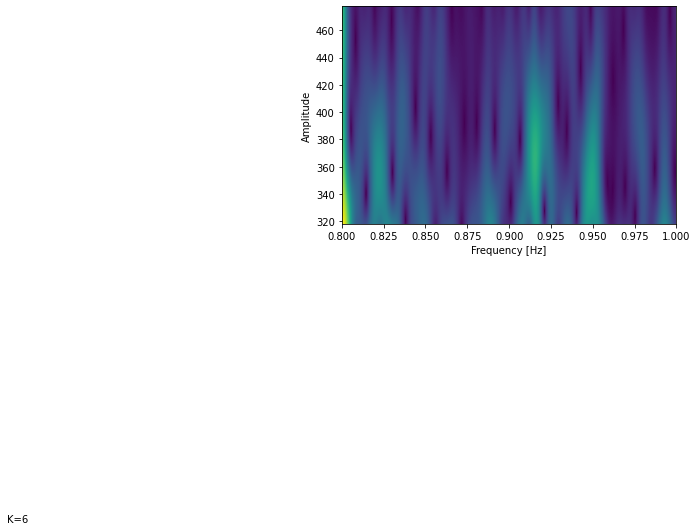

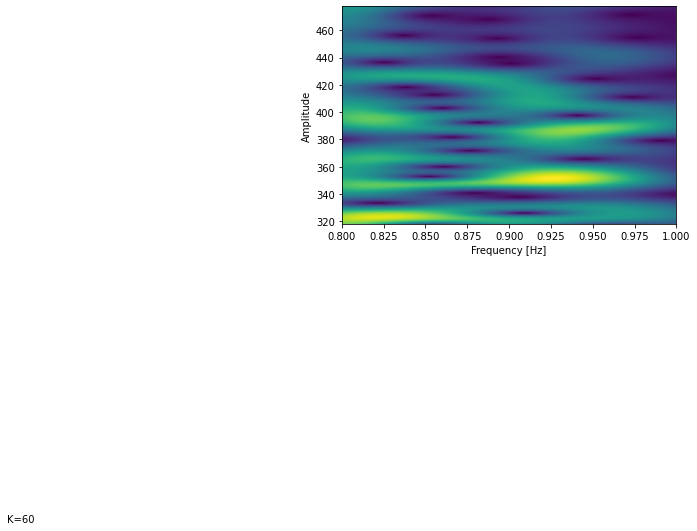

In [17]:
# implementer morlet wavelet i tidsdomenetet
def wavelet_td(omegaa, K, tk, tn):
    psi = C*( np.exp(-1j*omegaa*(tn-tk)) - np.exp(-K**2))*np.exp(-omegaa**2*(tn-tk)**2/(2*K)**2)
    return psi # returner wavelet ̈en, for gitte parametre

# wavelet transformen (i tidsdomenet)
def wavelet_transform_td(t, tk, xn, omegaa, K, N):
    A =  wavelet_td(omegaa,K,tk,t)
    gamma = np.zeros(N, dtype=np.complex )
    gamma = np.sum(np.conjugate(A)*xn)
    return gamma # returnerer gamma, for en gitt omegaa
# diagramfunksjon (felles for tids- og Fourierdomenet)

def wavelet_diagram(t, xn, omega_range, K, N):
    M = len(omega_range)
    diagram = np.zeros((M,N),dtype=np.complex)
    tk = t.copy()
    for i in range(N):
        for j in range(M):
            diagram[j,i] = wavelet_transform_td(t,tk[i], xn,omega_range[j],K,N)
    return diagram # returnerer et 2D diagram for en gitt K
# generere og plotte wavelets
K_vals = [6, 60]
tk = 0
C = 1
t = np.linspace(0.8,1,N)
for K in K_vals:
    omegas = np.linspace(2000,3000, N)# definere hvike analysefrekvenser du vil bruke her
    waveletDiagram6 = wavelet_diagram(t, x_new_range, omegas, K, N) # dette kallet gir ut en 2D diagram, og en gitt tidserie, valgt K-verdi og set av ønskete omegas
    plt.pcolormesh(t, omegas / 2.0 / np.pi, np.absolute(waveletDiagram6), shading='auto')
    plt.text(0.6,100,f'K={K}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.show()

Jeg synes det er vanskelig å forstå hva disse plottene mine betyr. Det virker som at fuglesangen er litt komplisert generelt sett.